   ## Machine Learning - Graded Assignment


### Problem Statement:
The ‘Life Expectancy’ dataset contains information about several health and economic factors 
that contribute to average life expectancy for different countries. It is our aim to study how these 
various factors impact the average life expectancy in the given countries

### Variable information:

Country: Name of the country

Status: Whether the country is Developed or Developing

Adult_Mortality: Mortality rate for age group 15-60 out of every 1000 individuals of the 
population

Infant_Deaths: Number of infant deaths per 1000 population

Hepatitis: Hepatitis B (HepB) immunization coverage for 1-year olds (Percentage)

Measles: Number of reported cases for measles per 1000 from population

BMI: Average Body Mass Index for entire population
Underfive_Deaths: Number of deaths under 5 years of age per 1000 population

Polio: Polio (Pol3) immunization coverage for 1-year olds (Percentage)

Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1-year 
olds (Percentage)

HIV: Deaths per 1000 live births due to HIV/AIDS (0-4 years)

GDP: Gross Domestic Product per capita (in USD)

Population: Population of the country

Malnourished10_19: Prevalence of malnutrition among children and adolescents for Age 10 to 
19 (Percentage)

Malnourished5_9: Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

Income_Index: Human Development Index (HDI) in terms of national income per capita (index 
ranging from 0 to 1)

Schooling: Number of years of Schooling

Life_Expectancy: Life Expectancy in age for the country

## Import Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 
import numpy as np

# import 'Numpy' 

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
#optional if you do rmse and mape
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Data Preparation

In [2]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\Machine Learning - Graded Assignment\Life expectancy.csv")

df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62.000000,65.000000,1154,19.100000,NaN,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,NaN,65.000000
1,Albania,Developing,8,0.000000,98.000000,0,57.200000,NaN,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21.000000,95.000000,63,59.500000,NaN,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335,66.000000,64.000000,118,23.300000,NaN,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Argentina,Developing,116,8.000000,94.000000,0,62.800000,NaN,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000


##   EDA & Visualization

In [3]:
# use 'shape' to check the dimension of data

df.shape

(124, 18)

In [4]:
# use 'info()' to understand the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       110 non-null    float64
 4   Hepatitis           119 non-null    float64
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    119 non-null    float64
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        121 non-null    float64
 16  Schoolin

In [8]:
df.columns.to_list()

['Country',
 'Status',
 'Adult_Mortality',
 'Infant_Deaths',
 'Hepatitis ',
 'Measles ',
 ' BMI ',
 'Underfive_Deaths ',
 'Polio',
 'Diphtheria ',
 ' HIV',
 'GDP',
 'Population',
 'Malnourished10_19 ',
 'Malnourished5_9',
 'Income_Index',
 'Schooling',
 'Expected']

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adult_Mortality,124.000000,160.475806,101.794506,3.000000,73.500000,139.500000,234.000000,438.000000
Infant_Deaths,110.000000,28.545455,100.156267,0.000000,0.000000,4.000000,19.750000,910.000000
Hepatitis,119.000000,87.596639,24.578590,6.000000,85.000000,94.000000,97.500000,198.000000
Measles,124.000000,2841.637097,11517.586950,0.000000,0.750000,37.000000,588.750000,90387.000000
BMI,124.000000,41.733871,21.186385,2.100000,20.950000,54.100000,59.750000,71.400000
Underfive_Deaths,119.000000,43.957983,158.755563,0.000000,1.000000,7.000000,23.500000,1110.000000
Polio,124.000000,86.637097,21.653342,6.000000,88.000000,95.000000,98.000000,99.000000
Diphtheria,124.000000,87.919355,19.122879,6.000000,89.000000,95.000000,98.000000,99.000000
HIV,124.000000,0.819355,1.764127,0.100000,0.100000,0.100000,0.400000,8.100000
GDP,124.000000,6866.816502,10885.243579,5.668726,639.799727,2728.291765,8437.562893,56554.387600


## Missing Value Analysis and Treatment

In [9]:
# 'isnull().sum()' returns the number of missing values in each variable
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Infant_Deaths,14,11.290323
Schooling,5,4.032258
Hepatitis,5,4.032258
Underfive_Deaths,5,4.032258
Income_Index,3,2.419355
Country,0,0.000000
GDP,0,0.000000
Malnourished5_9,0,0.000000
Malnourished10_19,0,0.000000
Population,0,0.000000


<AxesSubplot:>

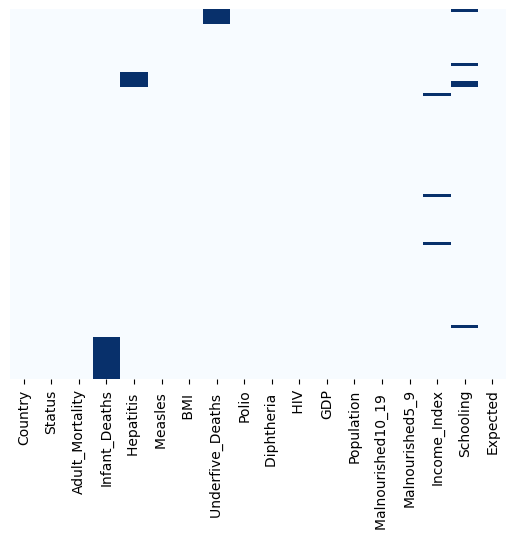

In [10]:
# heatmap for missing values

sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = "Blues")

In [11]:
# Since most of the are continous values wfile fill them with mean

df = df.fillna(df.mean())

In [12]:
df.isnull().sum()

Country               0
Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis             0
Measles               0
 BMI                  0
Underfive_Deaths      0
Polio                 0
Diphtheria            0
 HIV                  0
GDP                   0
Population            0
Malnourished10_19     0
Malnourished5_9       0
Income_Index          0
Schooling             0
Expected              0
dtype: int64

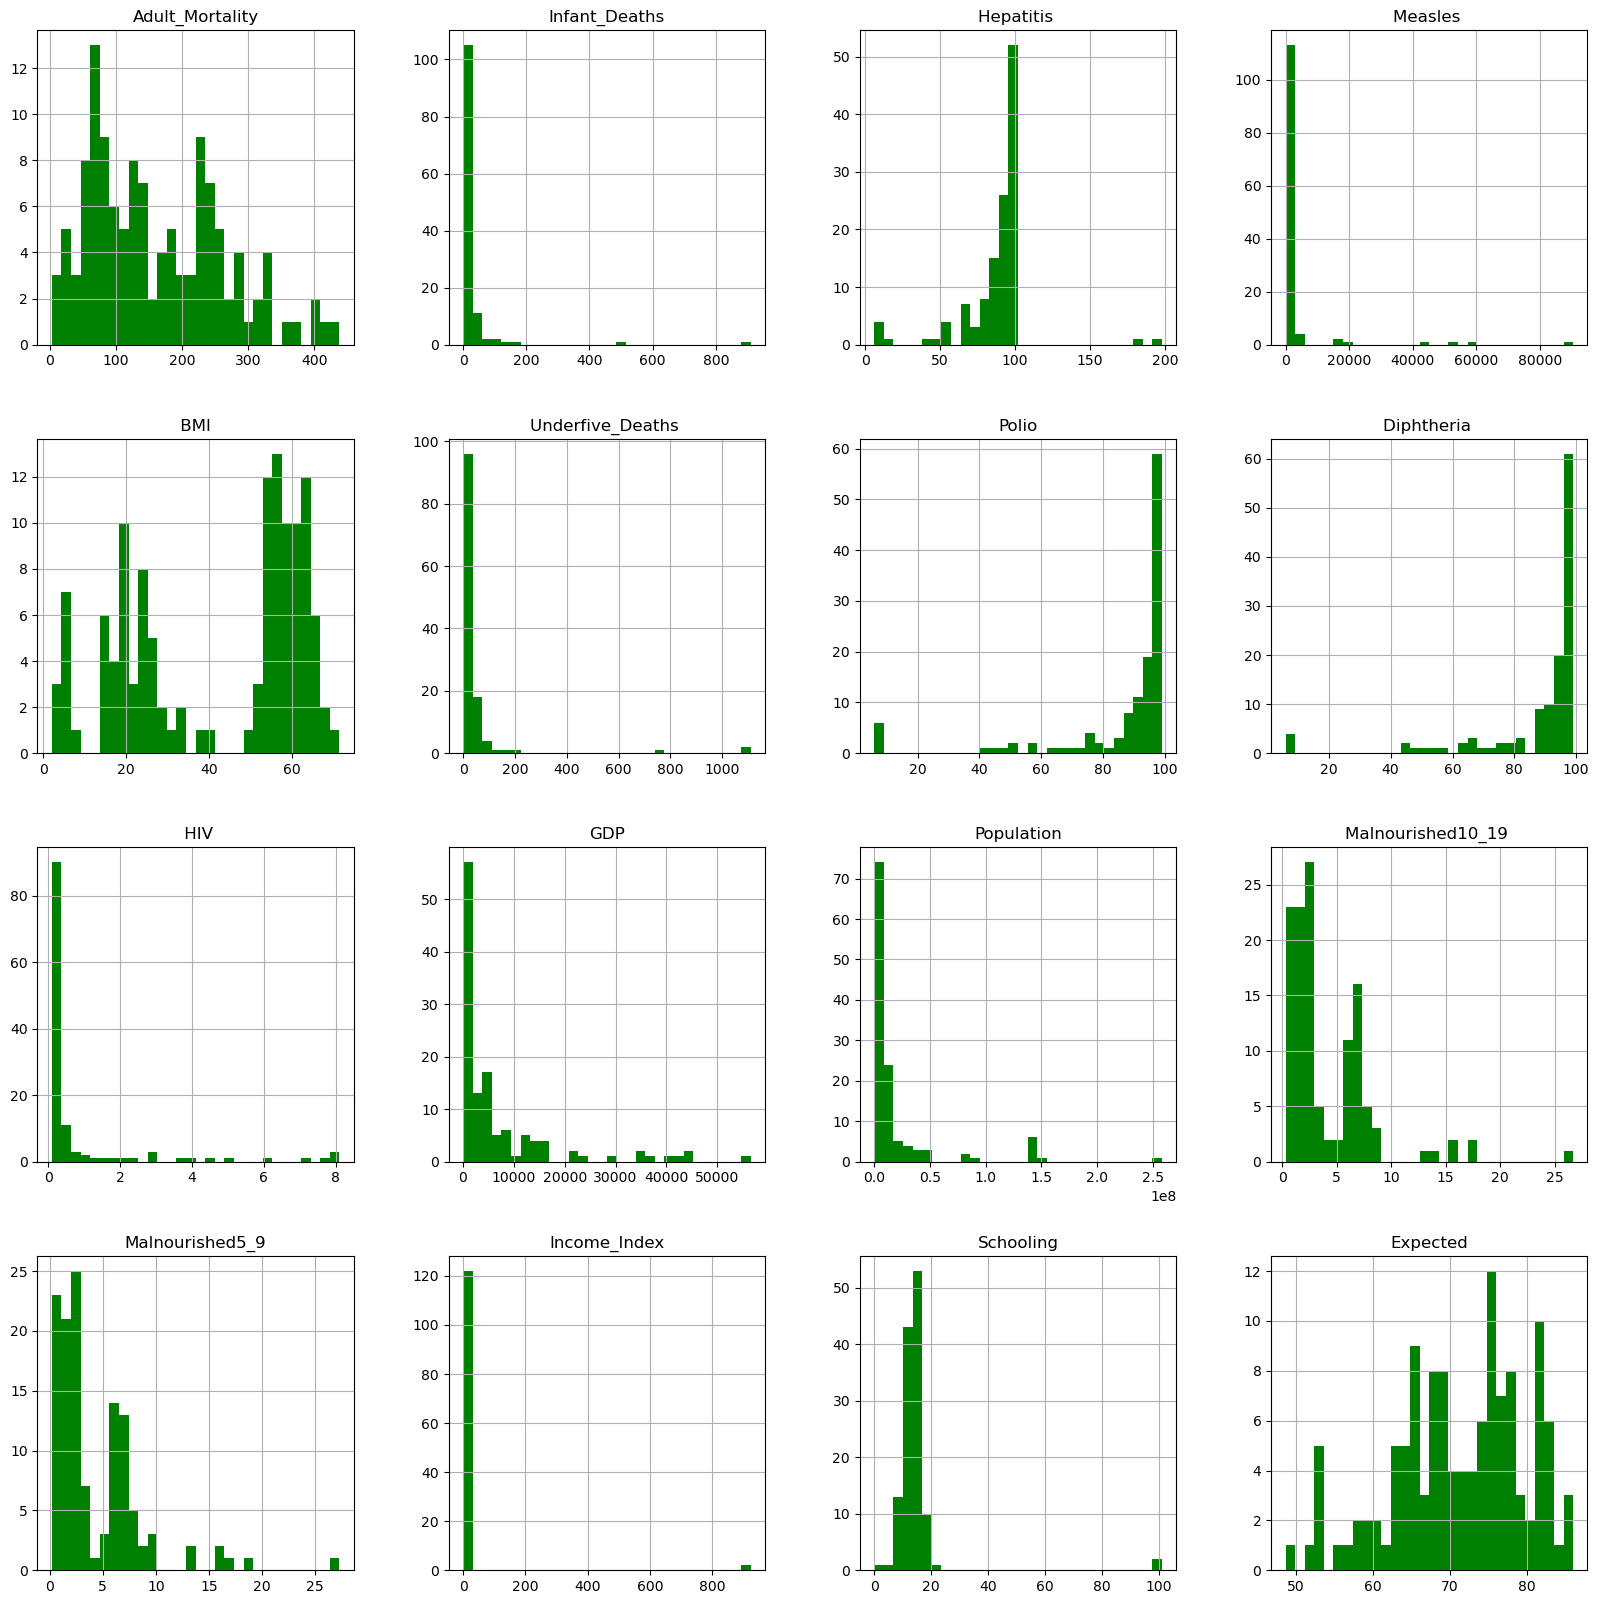

In [13]:
# Plot the histograph
df.hist(bins = 30, color = 'g',figsize = (20,20))
plt.show()

<Figure size 2000x2000 with 0 Axes>

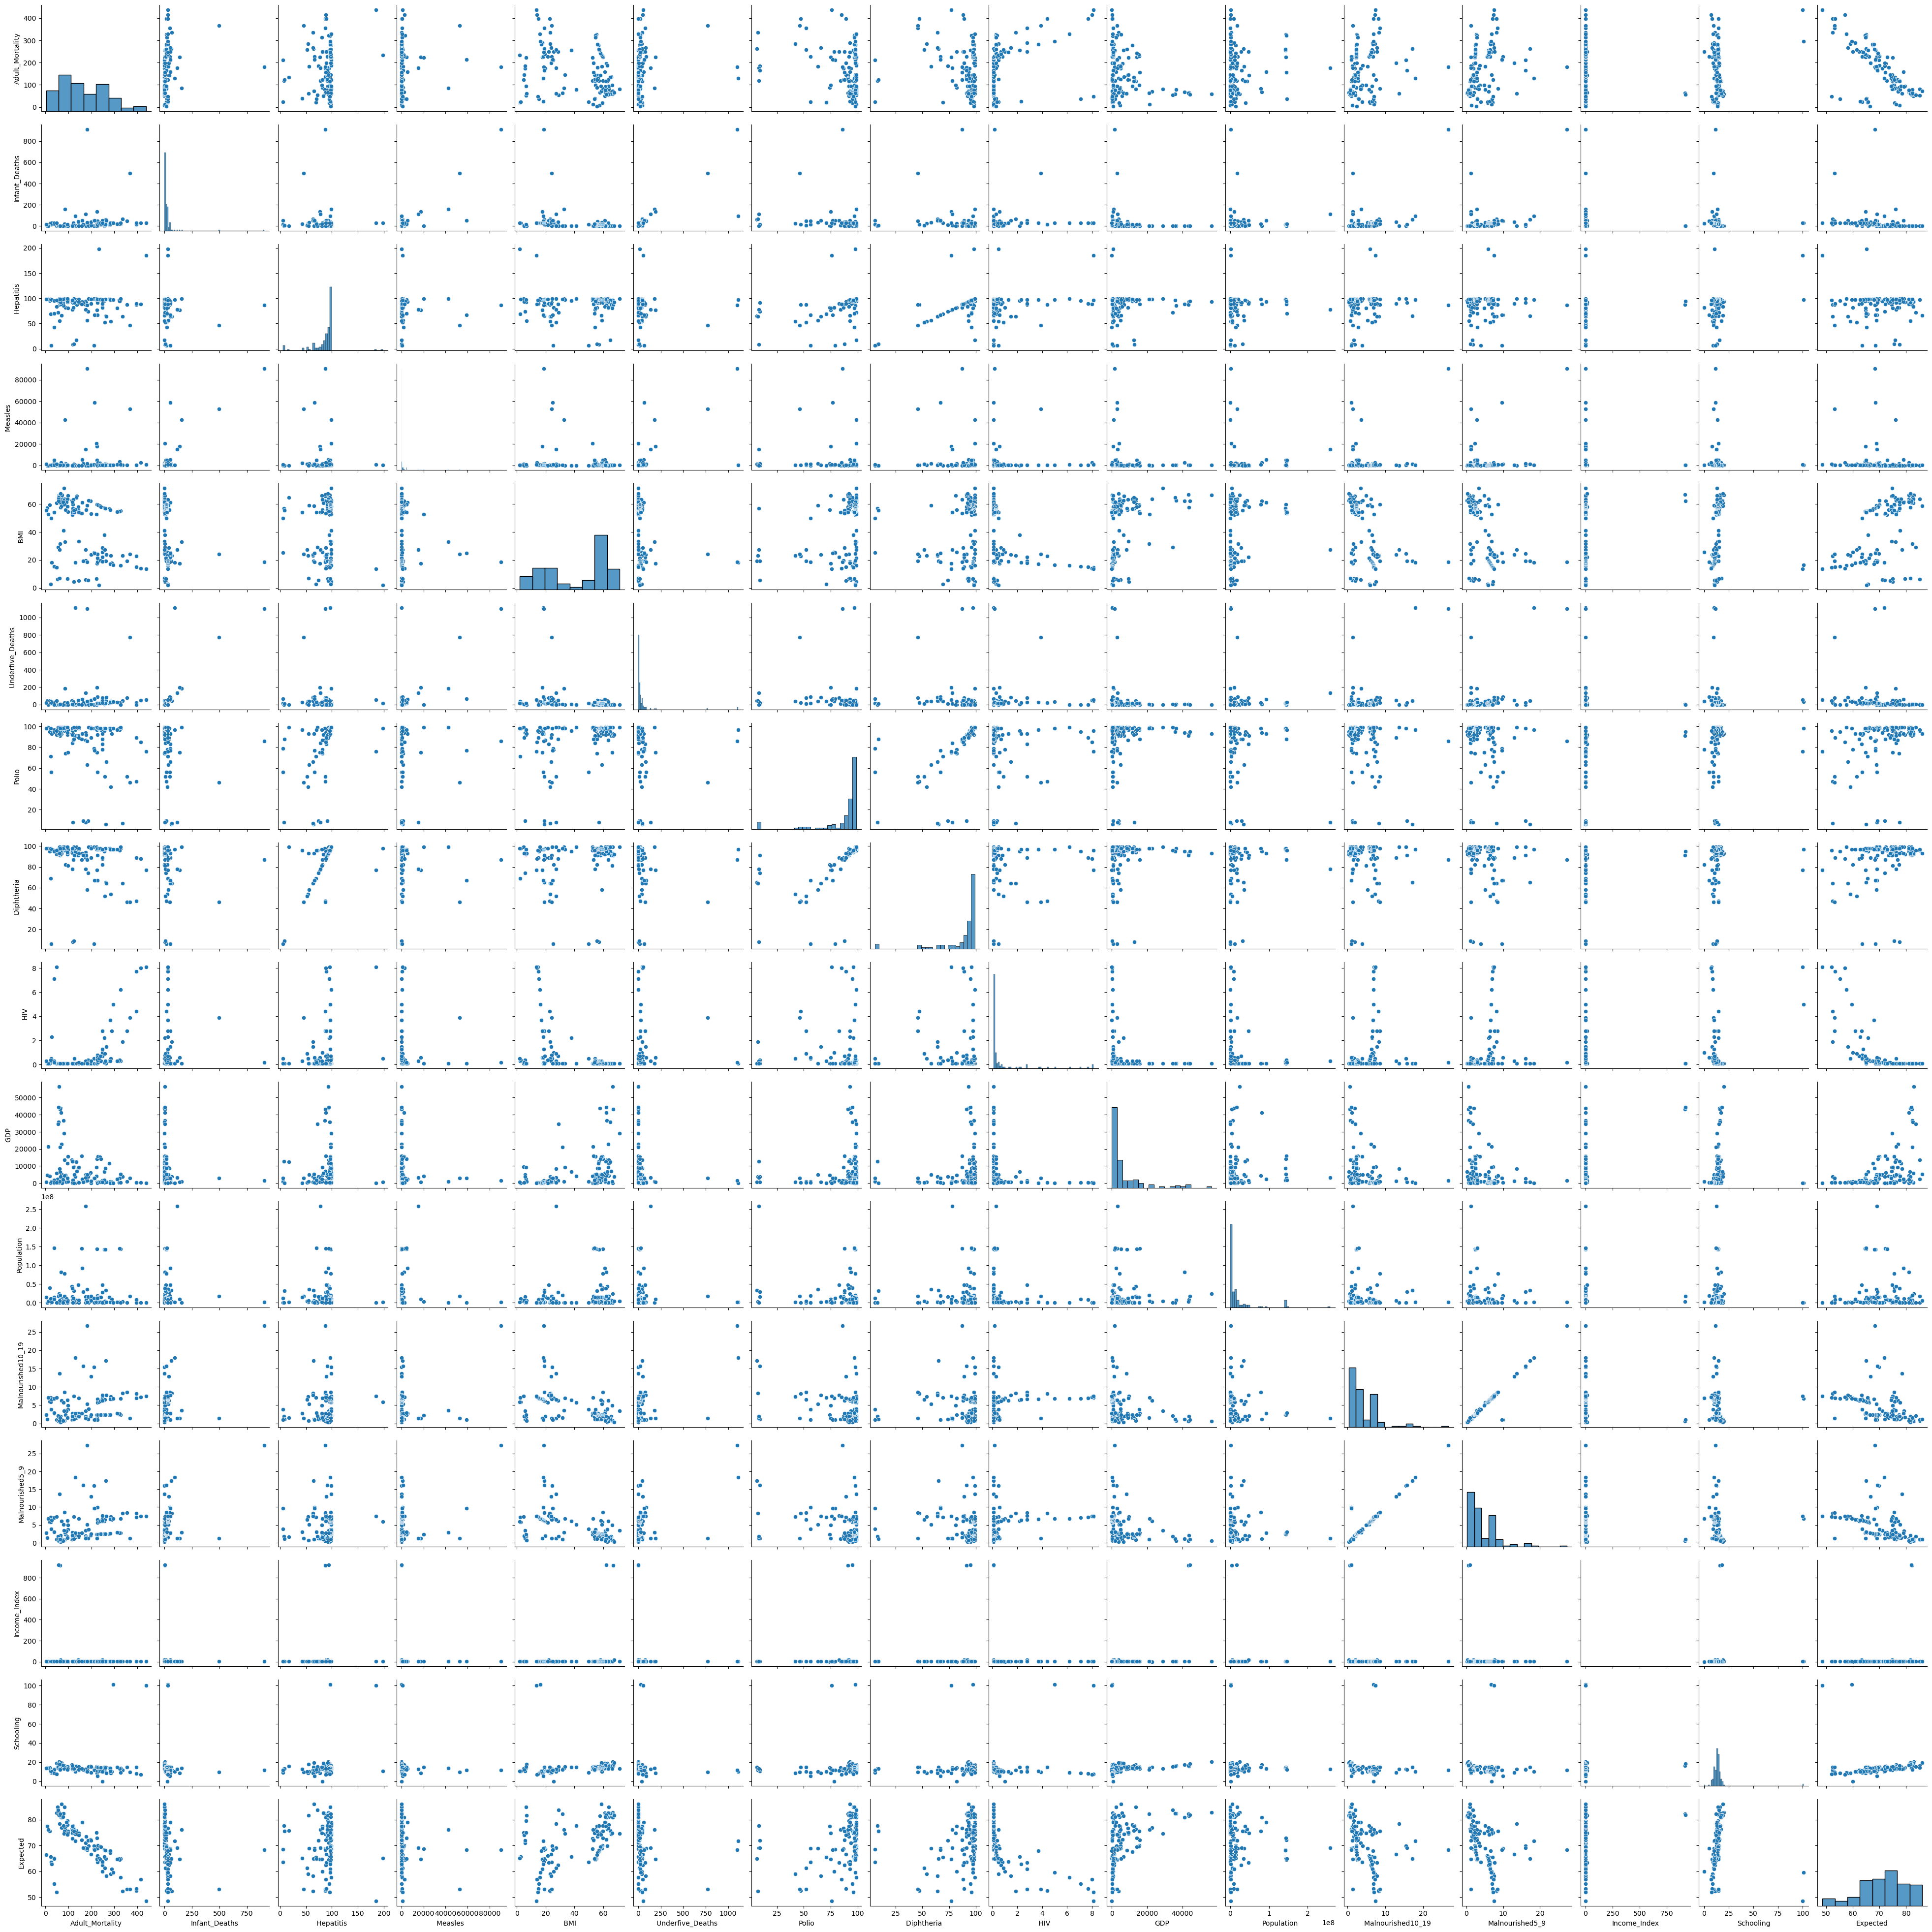

In [14]:
# Plot pairplot
plt.figure(figsize = (20,20))
sns.pairplot(df)

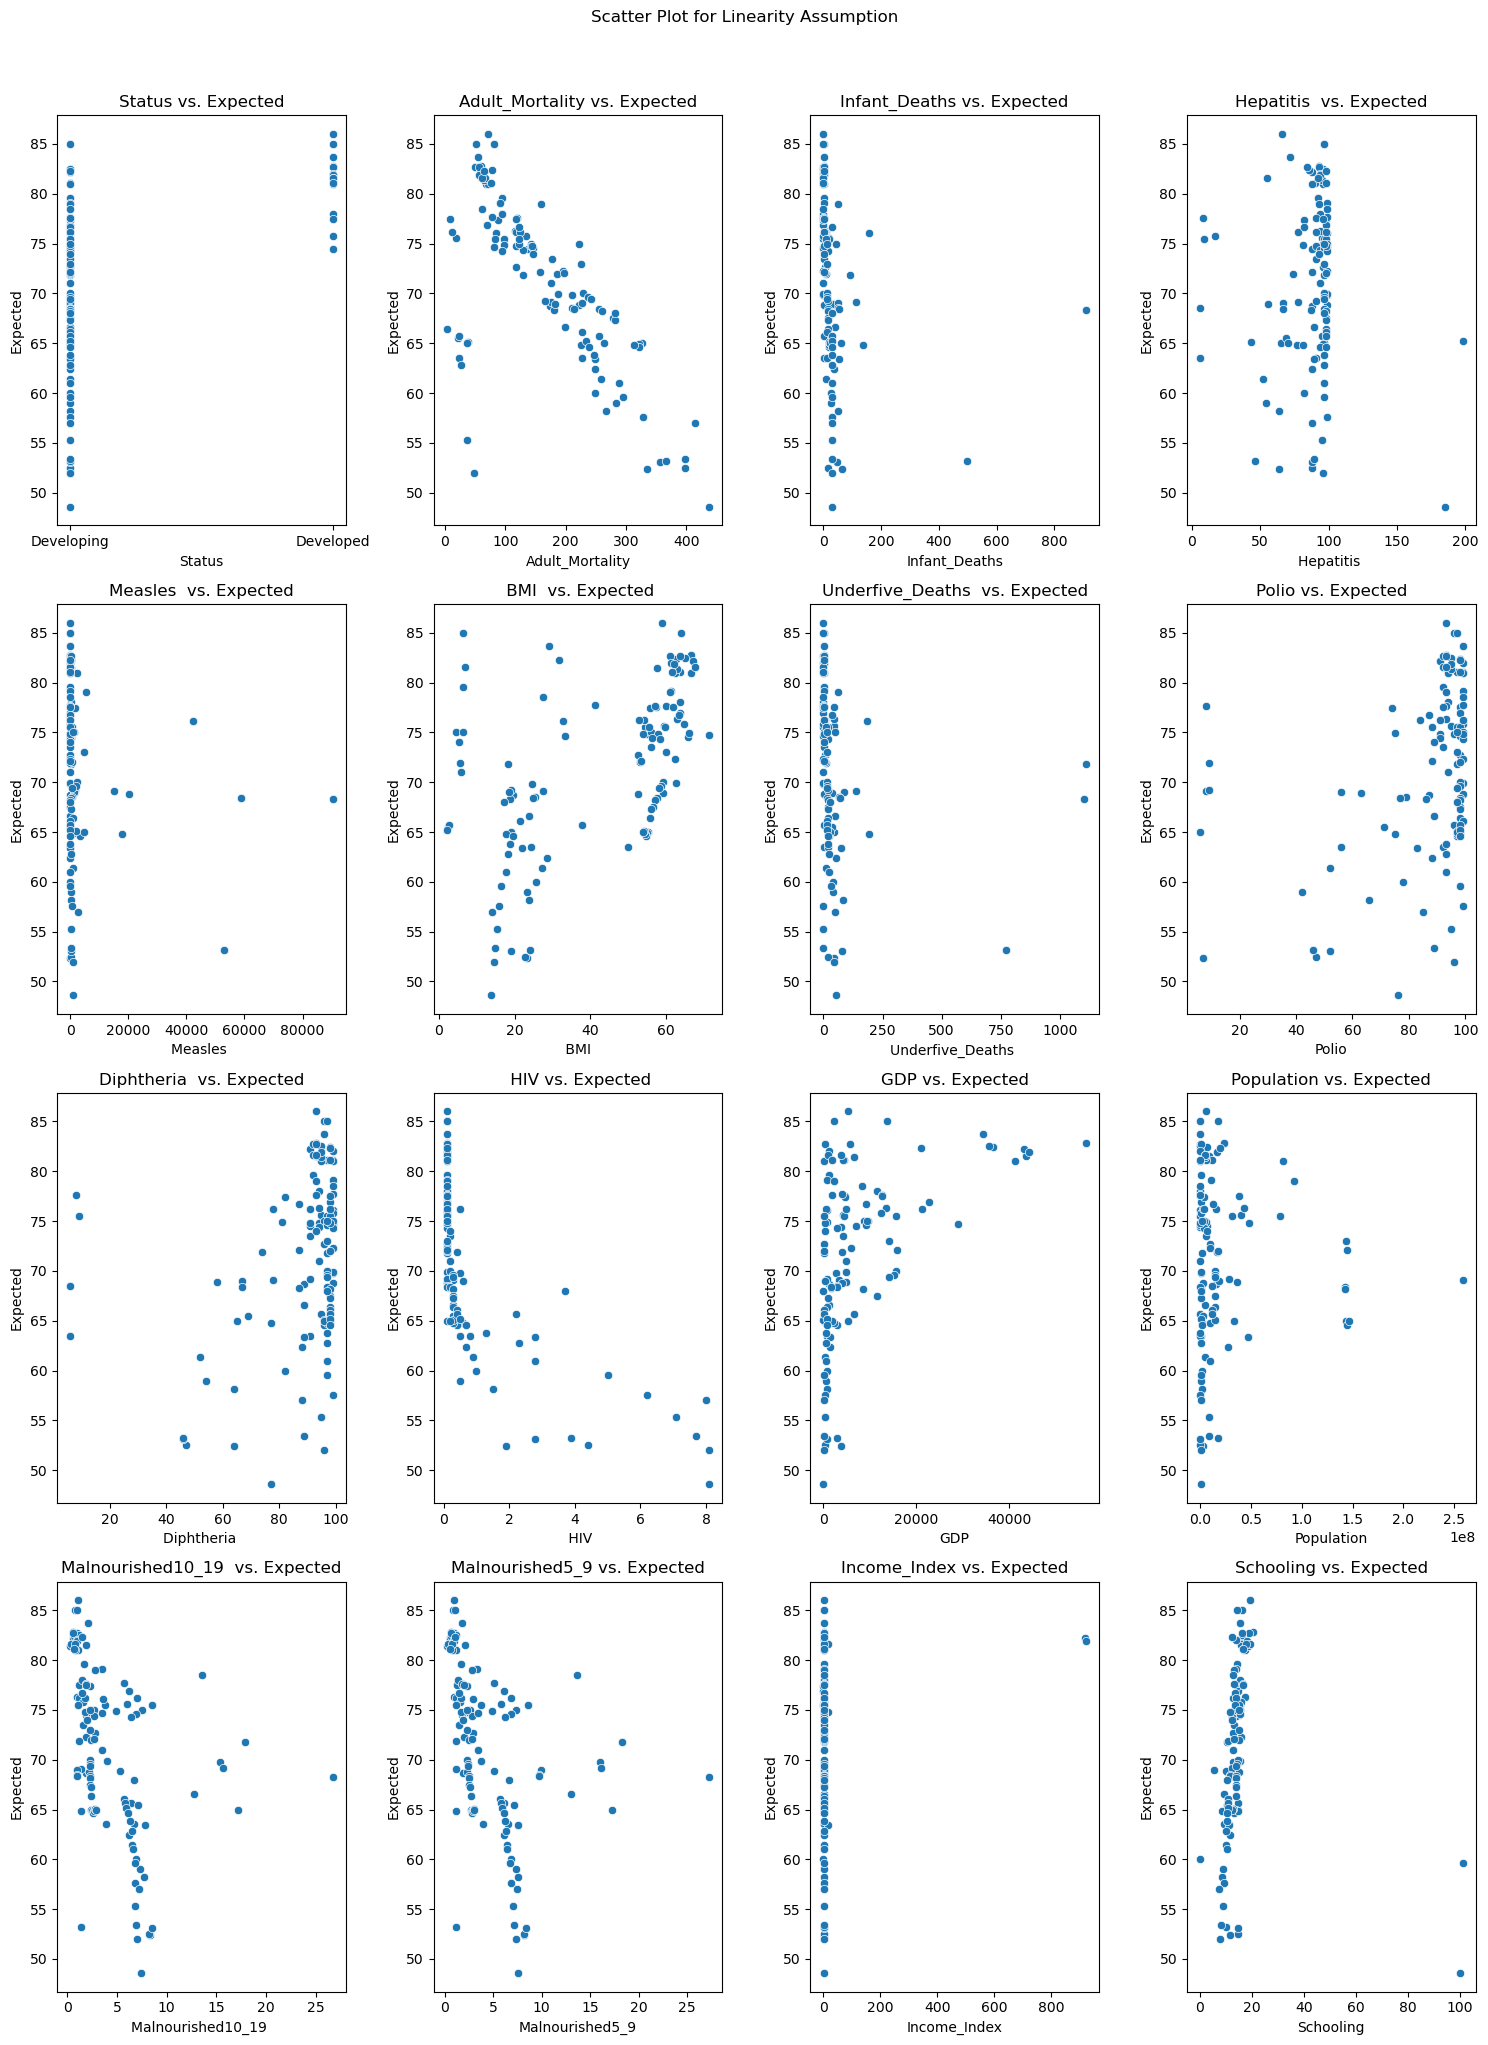

In [15]:
#Scatter plot

new_df = df.drop('Country',axis =1)
X=new_df.drop('Expected',axis=1)
y=new_df['Expected']

num_features = len(X.columns)

# Create subplots
fig, axes = plt.subplots(4,4,figsize=(15,5*4))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through features and create scatterplots
for i, feature in enumerate(X.columns):
    sns.scatterplot(x=X[feature], y=y, ax=axes[i])
    axes[i].set_title(f"{feature} vs. Expected")

# Hide any remaining empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Scatter Plot for Linearity Assumption',y=1.02)
plt.tight_layout()
plt.show()

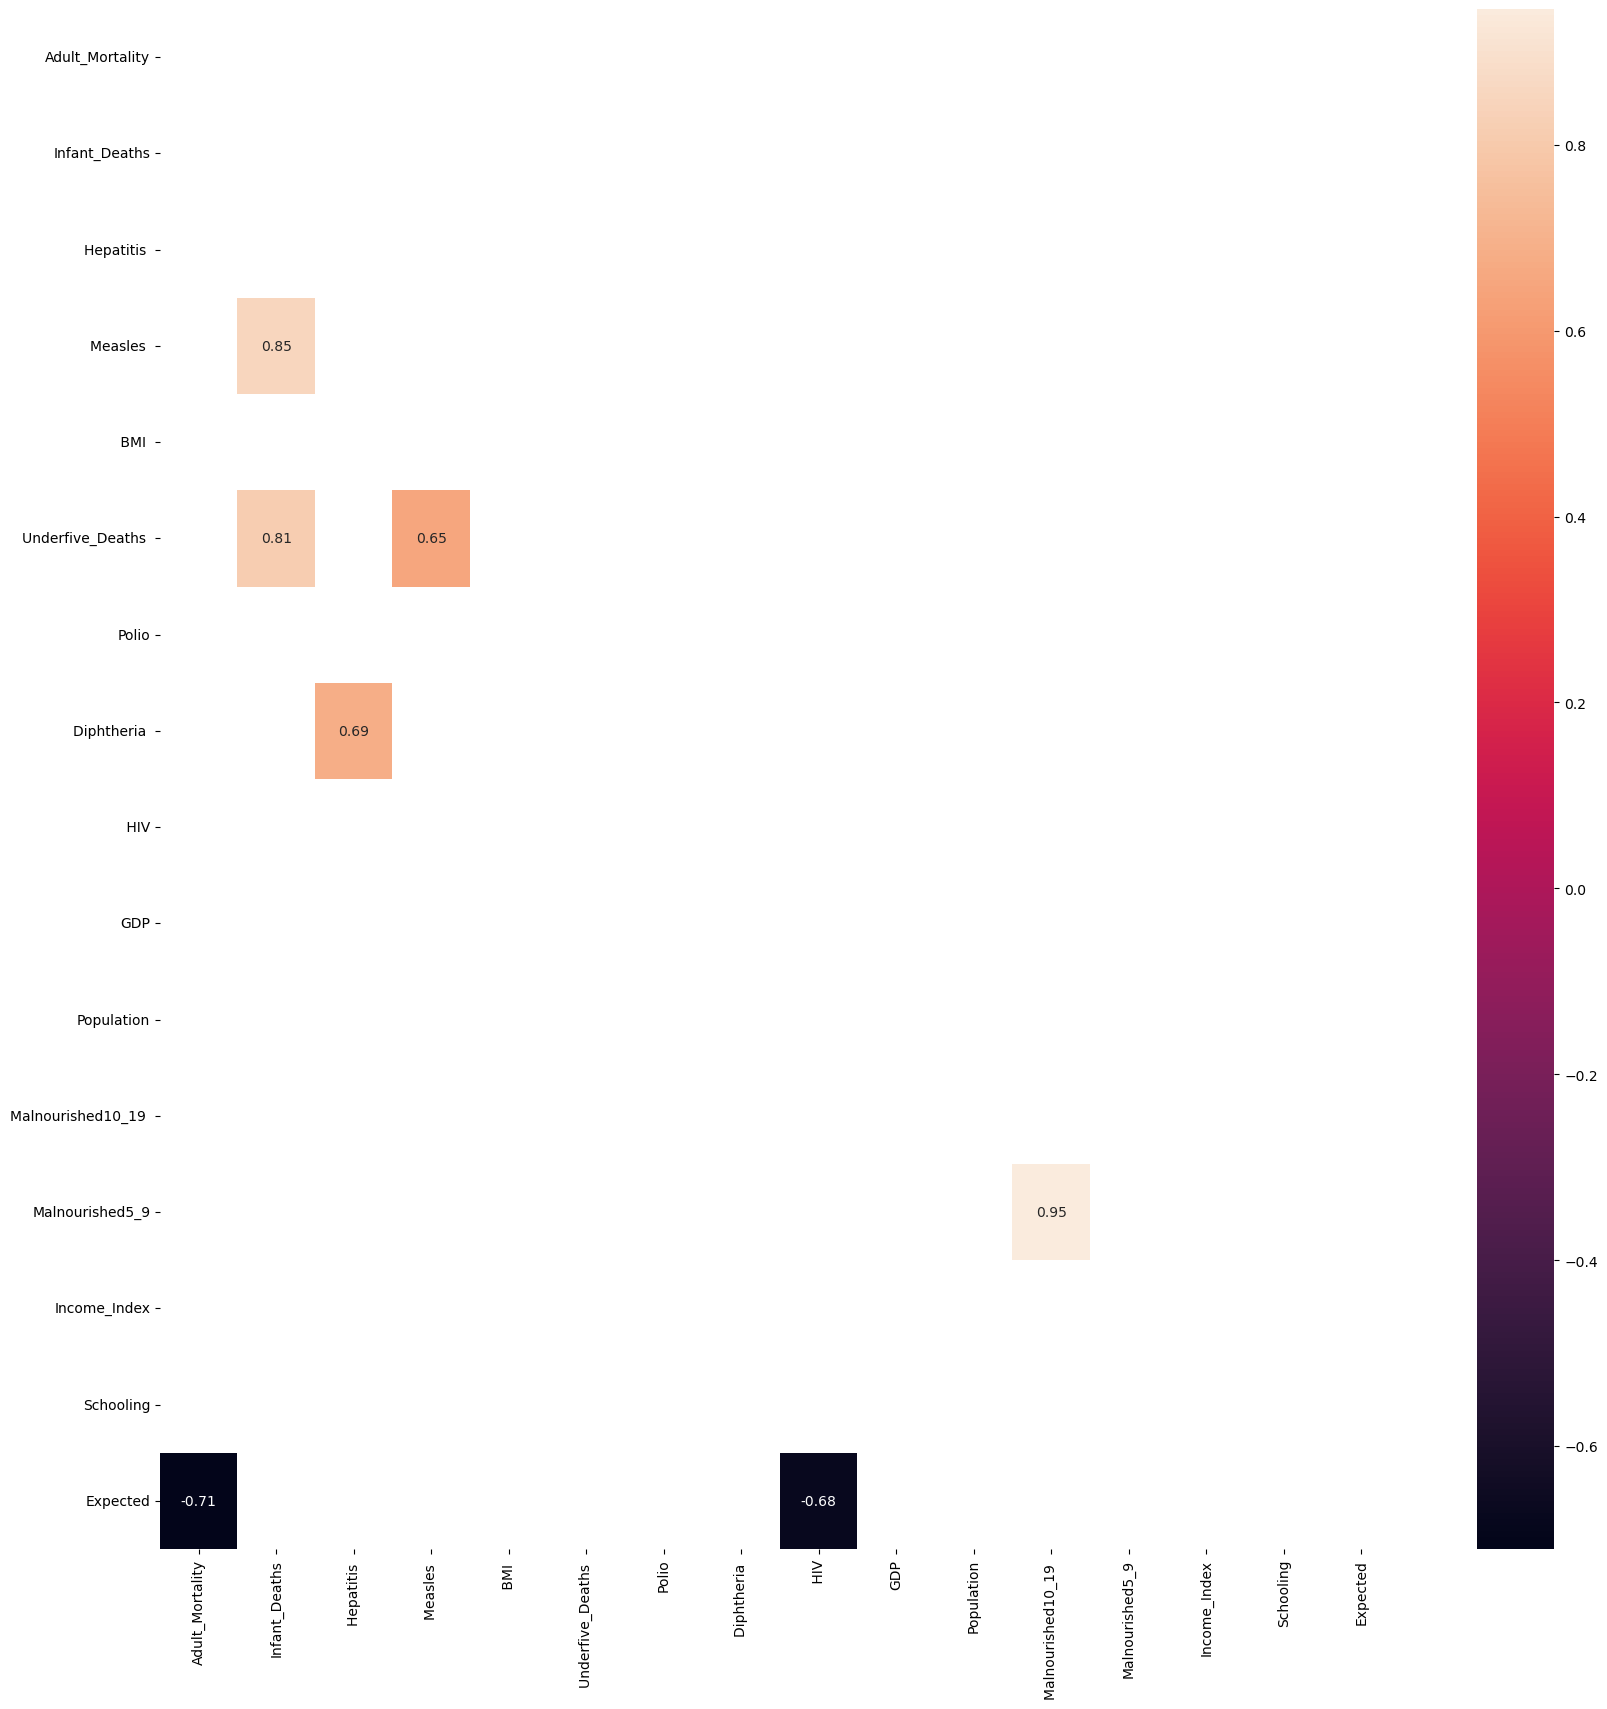

In [16]:
# Plot the correlation matrix

plt.figure(figsize = (20,20))
corr_matrix = df.corr()[np.abs(df.corr())>0.65]
sns.heatmap(corr_matrix, annot = True,mask = np.triu(np.ones_like(df.corr(),dtype =bool)))
plt.show()

In [17]:
# scale the independent numeric and target variable

df.iloc[:, 2:18] = df.iloc[:, 2:18].apply(lambda rec: (rec - rec.mean()) / rec.std())

df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,1.007168,0.354827,-0.938639,-0.146527,-1.068322,-0.000000,-3.724002,-1.198531,-0.407768,-0.577163,0.344581,3.185759,3.068416,-0.132279,0.000000,-0.734651
1,Albania,Developing,-1.497879,-0.302760,0.432144,-0.246722,0.730003,-0.000000,0.524764,0.527151,-0.407768,-0.210473,-0.471062,-0.729346,-0.729536,-0.129856,-0.041174,0.741508
2,Algeria,Developing,-1.389818,-0.080029,0.307527,-0.241252,0.838563,-0.000000,0.386218,0.370271,-0.407768,-0.251171,0.494188,0.445185,0.338638,-0.130011,-0.023675,0.517132
3,Angola,Developing,1.714476,0.397252,-0.980177,-0.236476,-0.870081,-0.000000,-3.677820,-1.250824,0.612567,-0.291314,-0.410170,1.007982,0.908331,-0.131832,-0.286158,-2.222619
4,Argentina,Developing,-0.436918,-0.217910,0.265988,-0.246722,0.994324,-0.000000,0.293853,0.317977,-0.407768,0.606354,0.580666,-0.778285,-0.824485,-0.129298,0.230058,0.599797


###  VIF

In [18]:
# create an empty dataframe to store the VIF for each variable
new_df1_num = df.select_dtypes(include = [np.number] )
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(new_df1_num.values, i) for i in range(new_df1_num.shape[1])]

# create a column of variable names
vif["Features"] = new_df1_num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,14.420805,Malnourished10_19
1,13.537113,Malnourished5_9
2,7.589070,Infant_Deaths
3,4.712845,Measles
4,4.445146,Expected
5,3.385983,Diphtheria
6,3.235327,Underfive_Deaths
7,2.487875,Hepatitis
8,2.424144,HIV
9,2.231290,Adult_Mortality


In [19]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(new_df1_num.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    vif["VIF_Factor"] = [variance_inflation_factor(new_df1_num.values, i) for i in range(new_df1_num.shape[1])]

    # create a column of variable names
    vif["Features"] = new_df1_num.columns

    # filter the variables with VIF greater than 5 and store it in a dataframe 'multi' 
    multi = vif[vif['VIF_Factor'] > 5]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    if (df_sorted.empty == False):
        new_df1_num = new_df1_num.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor           Features
0     2.181381    Adult_Mortality
1     2.468907         Hepatitis 
2     1.763687           Measles 
3     1.855849               BMI 
4     2.090394  Underfive_Deaths 
5     2.021041              Polio
6     3.102855        Diphtheria 
7     2.409894                HIV
8     1.625943                GDP
9     1.192938         Population
10    1.927400    Malnourished5_9
11    1.244960       Income_Index
12    1.296584          Schooling
13    4.362297           Expected


In [22]:
new_df1_num.head()

,Adult_Mortality,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished5_9,Income_Index,Schooling,Expected
0,1.007168,-0.938639,-0.146527,-1.068322,-0.000000,-3.724002,-1.198531,-0.407768,-0.577163,0.344581,3.068416,-0.132279,0.000000,-0.734651
1,-1.497879,0.432144,-0.246722,0.730003,-0.000000,0.524764,0.527151,-0.407768,-0.210473,-0.471062,-0.729536,-0.129856,-0.041174,0.741508
2,-1.389818,0.307527,-0.241252,0.838563,-0.000000,0.386218,0.370271,-0.407768,-0.251171,0.494188,0.338638,-0.130011,-0.023675,0.517132
3,1.714476,-0.980177,-0.236476,-0.870081,-0.000000,-3.677820,-1.250824,0.612567,-0.291314,-0.410170,0.908331,-0.131832,-0.286158,-2.222619
4,-0.436918,0.265988,-0.246722,0.994324,-0.000000,0.293853,0.317977,-0.407768,0.606354,0.580666,-0.824485,-0.129298,0.230058,0.599797


In [20]:
# Checking the unique values in country to consider it as a categorical variable

df['Status'].nunique()

2

In [24]:
# Perform one-hot encoding

new_df = df.drop('Country',axis = 1)
new_df1 = pd.get_dummies(data = new_df,columns = None)
new_df1.head(10)

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,Status_Developed,Status_Developing
0,1.007168,0.354827,-0.938639,-0.146527,-1.068322,-0.000000,-3.724002,-1.198531,-0.407768,-0.577163,0.344581,3.185759,3.068416,-0.132279,0.000000,-0.734651,0,1
1,-1.497879,-0.302760,0.432144,-0.246722,0.730003,-0.000000,0.524764,0.527151,-0.407768,-0.210473,-0.471062,-0.729346,-0.729536,-0.129856,-0.041174,0.741508,0,1
2,-1.389818,-0.080029,0.307527,-0.241252,0.838563,-0.000000,0.386218,0.370271,-0.407768,-0.251171,0.494188,0.445185,0.338638,-0.130011,-0.023675,0.517132,0,1
3,1.714476,0.397252,-0.980177,-0.236476,-0.870081,-0.000000,-3.677820,-1.250824,0.612567,-0.291314,-0.410170,1.007982,0.908331,-0.131832,-0.286158,-2.222619,0,1
4,-0.436918,-0.217910,0.265988,-0.246722,0.994324,-0.000000,0.293853,0.317977,-0.407768,0.606354,0.580666,-0.778285,-0.824485,-0.129298,0.230058,0.599797,0,1
5,-0.417270,-0.292154,0.265988,-0.243856,0.621443,-0.276265,0.432400,0.317977,-0.407768,-0.596878,-0.470994,-0.509122,-0.515901,-0.130028,-0.172415,0.422658,0,1
6,-0.996869,-0.292154,0.224449,-0.240297,1.173684,-0.276265,0.293853,0.265684,-0.407768,4.564672,0.102013,-0.876163,-0.895696,-0.128344,0.501291,1.367399,1,0
7,-0.937927,-0.302760,0.224449,-0.219893,0.748883,-0.282696,0.293853,0.265684,-0.407768,3.380644,-0.267581,-0.558060,-0.539638,-0.128731,0.107566,1.213879,1,0
8,-0.417270,-0.249729,0.349066,-0.246722,0.508163,-0.244110,0.524764,0.422564,-0.407768,-0.625756,-0.242801,-0.337836,-0.349741,-0.129882,-0.172415,0.174663,0,1
9,-0.898632,-0.302760,0.432144,-0.246722,1.032084,-0.282696,0.524764,0.527151,-0.407768,1.453533,-0.444499,0.494124,0.409850,-0.136395,-0.014925,0.670652,0,1


# Build the MLR Model

##  Create training and testing dataset

In [25]:
# Create train and test data

X = new_df1.drop(columns = ['Expected'])
y = new_df1[['Expected']]

In [26]:
X

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Status_Developed,Status_Developing
0,1.007168,0.354827,-0.938639,-0.146527,-1.068322,-0.000000,-3.724002,-1.198531,-0.407768,-0.577163,0.344581,3.185759,3.068416,-0.132279,0.000000,0,1
1,-1.497879,-0.302760,0.432144,-0.246722,0.730003,-0.000000,0.524764,0.527151,-0.407768,-0.210473,-0.471062,-0.729346,-0.729536,-0.129856,-0.041174,0,1
2,-1.389818,-0.080029,0.307527,-0.241252,0.838563,-0.000000,0.386218,0.370271,-0.407768,-0.251171,0.494188,0.445185,0.338638,-0.130011,-0.023675,0,1
3,1.714476,0.397252,-0.980177,-0.236476,-0.870081,-0.000000,-3.677820,-1.250824,0.612567,-0.291314,-0.410170,1.007982,0.908331,-0.131832,-0.286158,0,1
4,-0.436918,-0.217910,0.265988,-0.246722,0.994324,-0.000000,0.293853,0.317977,-0.407768,0.606354,0.580666,-0.778285,-0.824485,-0.129298,0.230058,0,1
5,-0.417270,-0.292154,0.265988,-0.243856,0.621443,-0.276265,0.432400,0.317977,-0.407768,-0.596878,-0.470994,-0.509122,-0.515901,-0.130028,-0.172415,0,1
6,-0.996869,-0.292154,0.224449,-0.240297,1.173684,-0.276265,0.293853,0.265684,-0.407768,4.564672,0.102013,-0.876163,-0.895696,-0.128344,0.501291,1,0
7,-0.937927,-0.302760,0.224449,-0.219893,0.748883,-0.282696,0.293853,0.265684,-0.407768,3.380644,-0.267581,-0.558060,-0.539638,-0.128731,0.107566,1,0
8,-0.417270,-0.249729,0.349066,-0.246722,0.508163,-0.244110,0.524764,0.422564,-0.407768,-0.625756,-0.242801,-0.337836,-0.349741,-0.129882,-0.172415,0,1
9,-0.898632,-0.302760,0.432144,-0.246722,1.032084,-0.282696,0.524764,0.527151,-0.407768,1.453533,-0.444499,0.494124,0.409850,-0.136395,-0.014925,0,1


In [27]:
y

,Expected
0,-0.734651
1,0.741508
2,0.517132
3,-2.222619
4,0.599797
5,0.422658
6,1.367399
7,1.213879
8,0.174663
9,0.670652


In [28]:
X.shape

(124, 17)

In [29]:
y.shape

(124, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     27.74
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.89e-26
Time:                        21:22:36   Log-Likelihood:                -48.684
No. Observations:                  99   AIC:                             131.4
Df Residuals:                      82   BIC:                             175.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.4234      0

In [32]:
y_pred_full = MLR_full_model.predict(X_test)
y_pred_full

108    0.654310
2      0.763297
47    -0.207167
67     0.215431
92     0.195057
12     0.261714
95     0.139102
102    0.916200
26     0.814940
105   -0.577052
114    0.083736
118   -2.058685
20     0.525599
123   -2.780248
83     0.949342
39    -0.380889
63     0.921971
113   -0.595767
58     1.102248
86    -0.402067
51     1.178815
19     0.454243
107    0.799019
100   -0.116859
104   -0.413400
dtype: float64

## MLR Model after Removing Insignificant Variables

In [33]:
new_df1_num.columns

Index(['Adult_Mortality', 'Hepatitis ', 'Measles ', ' BMI ',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Expected'],
      dtype='object')

In [42]:

X_signi_var = new_df1_num.drop(columns = ['Expected']).copy()


y_signi_var = df[['Expected']].copy()

X_signi_var = sm.add_constant(X_signi_var)


X_train_signi_var, X_test_signi_var, y_train_signi_var, y_test_signi_var = train_test_split(X_signi_var, y_signi_var, 
                                                                                            random_state=1, test_size = 0.3)

print('X_train_signi_var', X_train_signi_var.shape)
print('y_train_signi_var', y_train_signi_var.shape)


print('X_test_signi_var', X_test_signi_var.shape)
print('y_test_signi_var', y_test_signi_var.shape)

X_train_signi_var (86, 14)
y_train_signi_var (86, 1)
X_test_signi_var (38, 14)
y_test_signi_var (38, 1)


## Build the multiple linear regression model using the OLS method

In [43]:
# build a model to training dataset
#fit() is used to fit the OLS model
MLR_model_vif = sm.OLS(y_train_signi_var, X_train_signi_var).fit()

print(MLR_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     21.33
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.21e-19
Time:                        21:29:32   Log-Likelihood:                -54.781
No. Observations:                  86   AIC:                             137.6
Df Residuals:                      72   BIC:                             171.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0354      0.05

## Calculate the p-values to know the insignificant variables

In [44]:
# calculate p-values for all the independent variables in the MLR_model
MLR_pvalues = pd.DataFrame(MLR_model_vif.pvalues, columns = ["P-Value"])

MLR_pvalues

,P-Value
const,0.524662
Adult_Mortality,0.000001
Hepatitis,0.601153
Measles,0.953036
BMI,0.698547
Underfive_Deaths,0.816888
Polio,0.521204
Diphtheria,0.112156
HIV,0.000003
GDP,0.019168


#### Create a list of insignificant variables.

In [45]:

insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

insigni_var = insignificant_var.index

insigni_var = insigni_var.to_list()
insigni_var

['Hepatitis ',
 'Measles ',
 ' BMI ',
 'Underfive_Deaths ',
 'Polio',
 'Diphtheria ',
 'Population',
 'Malnourished5_9',
 'Income_Index',
 'Schooling']

In [46]:
# drop the insignificant variables from the dataframe 'X_train_signi_var'

X_train_signi_var = X_train_signi_var.drop(['Hepatitis ',
 'Measles ',
 ' BMI ',
 'Underfive_Deaths ',
 'Polio',
 'Diphtheria ',
 'Population',
 'Malnourished5_9',
 'Income_Index',
 'Schooling'], axis=1)

# drop the insignificant variables from the dataframe 'X_test_signi_var'

X_test_signi_var = X_test_signi_var.drop(['Hepatitis ',
 'Measles ',
 ' BMI ',
 'Underfive_Deaths ',
 'Polio',
 'Diphtheria ',
 'Population',
 'Malnourished5_9',
 'Income_Index',
 'Schooling'], axis=1)


MLR_model_with_significant_var = sm.OLS(y_train_signi_var, X_train_signi_var).fit()

print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     77.41
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           7.54e-24
Time:                        21:30:26   Log-Likelihood:                -64.915
No. Observations:                  86   AIC:                             137.8
Df Residuals:                      82   BIC:                             147.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0467      0.057     

#### Predict the Total_Reimbursement using X_test_signi_var

In [47]:
y_pred_signi_var = MLR_model_with_significant_var.predict(X_test_signi_var)
y_pred_signi_var

48    -0.653735
114    0.349265
73    -0.192687
106   -0.732766
45    -0.494268
31     0.610635
67     0.736317
46     0.516721
98    -0.430769
83     1.223700
115   -1.107255
33     0.661685
100   -0.377286
117   -1.566544
102    0.847280
121   -0.862175
2      0.866180
89     0.514748
110    0.712967
51     0.740235
65    -0.600888
78     0.616016
80    -0.378804
17     0.515758
85     0.117556
54     0.537711
35     0.285786
69     0.727725
88    -0.171735
99    -0.346484
77     1.421232
42     1.166522
105   -0.787120
55     0.034564
53    -0.002545
44     1.305652
62    -0.889311
58     0.602924
dtype: float64

## Assumptions After MLR Model

 Now, use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:

1.Autocorrelation

2.Heteroskedasticity

3.Tests of Normality

### Autocorrelation
We can check the correlation between the residuals using the Durbin-Watson test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.

 summary of the model with significant variables to check the autocorrelation.

In [48]:
# print the model summary
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     77.41
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           7.54e-24
Time:                        21:30:44   Log-Likelihood:                -64.915
No. Observations:                  86   AIC:                             137.8
Df Residuals:                      82   BIC:                             147.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0467      0.057     

### Heteroskedasticity

If the residuals have constant variance across different values of the predicted values, then it is known as Homoskedasticity. The absence of homoskedasticity is known as, heteroskedasticity. One of the assumptions of linear regression is that heteroskedasticity should not be present. Let us study two different tests to check the presence of heteroskedasticity.

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.
The test hypothesis for the Breusch-Pagan test is given as:

Ho: There is homoskedasticity present in the data

H1: There is a heteroskedasticity present in the data

In [49]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model along with the intercept
test = sms.het_breuschpagan(MLR_model_with_significant_var.resid, MLR_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 9.660415529063945), ('p-value', 1.5715064464964035e-05)]

### Tests for Normality
As per the assumptions of linear regression, residuals should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed.

##### 1. Q-Q Plot
Q-Q plot is s visualization technique to check the normality of the residuals. It plots the quantiles of observed data versus the quantiles of the standard normal distribution.

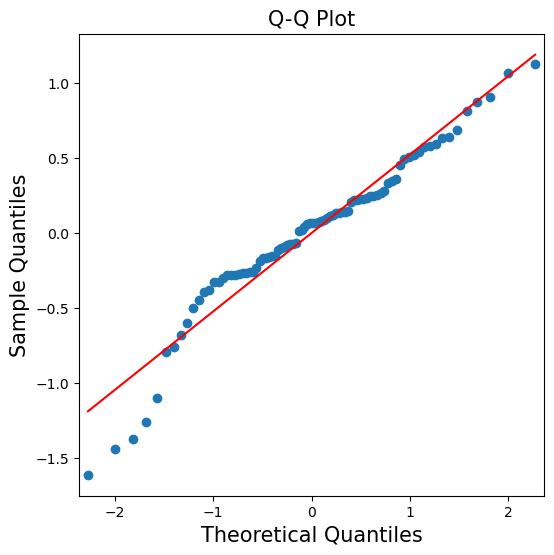

In [50]:

plt.rcParams['figure.figsize'] = [6,6]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_with_significant_var.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

#### 2. Shapiro Wilk Test
The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:

Ho: Residuals are normally distributed

H1: Residuals are not normally distributed

In [51]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_model_with_significant_var.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9520530700683594
P-Value: 0.0029654805548489094


### Model Evaluation

In [52]:
# print the model summary
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     77.41
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           7.54e-24
Time:                        21:31:28   Log-Likelihood:                -64.915
No. Observations:                  86   AIC:                             137.8
Df Residuals:                      82   BIC:                             147.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0467      0.057     

### R-Squared

In [53]:
# calculate R-Squared on train dataset
r_sq_mlr = MLR_model_with_significant_var.rsquared

r_sq_mlr

0.7390549880354991

### Adjusted R-Squared

In [54]:
# calculate adjusted R-Squared on train dataset
adj_r_sq = MLR_model_with_significant_var.rsquared_adj

adj_r_sq

0.7295082193050905

### Model Performance

In [55]:
# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train_signi_var'
# y_train_signi_var: actual values of the target variable for the train dataset

# For testing set:
# test_pred: prediction made by the model on the test dataset 'X_test_signi_var'
# y_test_signi_var: actual values of the target variable for the test dataset

# predict the output of the target variable from the train data 
train_pred = MLR_model_with_significant_var.predict(X_train_signi_var)

# predict the output of the target variable from the test data
test_pred = MLR_model_with_significant_var.predict(X_test_signi_var)

### Mean Squared Error (MSE)

In [56]:

# calculate the MSE for the train data
mse_train = round(mean_squared_error(y_train_signi_var, train_pred),4)

print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
mse_test = round(mean_squared_error(y_test_signi_var, test_pred),4)

print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.2649
Mean Squared Error (MSE) on test set:  0.3867


### Root Mean Squared Error (RMSE)

In [57]:
# MSE for the train data
mse_train = mean_squared_error(y_train_signi_var, train_pred)

# take the square root of the MSE to calculate the RMSE
rmse_train = round(np.sqrt(mse_train), 4)

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_signi_var, test_pred)

# take the square root of the MSE to calculate the RMSE
rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.5147
Root Mean Squared Error (RMSE) on test set:  0.6219


### Mean Absolute Error (MAE)

In [58]:

# calculate the MAE for the train data
mae_train = round(mean_absolute_error(y_train_signi_var, train_pred),4)

print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
mae_test = round(mean_absolute_error(y_test_signi_var, test_pred),4)

print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  0.3795
Mean Absolute Error (MAE) on test set:  0.4378


## Compare Model Performances

Let us compare the model performance metrics (MSE, RMSE, MAE) for `MLR_full_model` and `MLR_model_with_significant_var` to find the best model.

In [65]:
# create the table for all the model performance metrics
# metrics considered for model comparision are MSE, RMSE, MAE and MAPE
# create a list of column names
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE']

# creating a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

Now, calculate performance measure for MLR_full_model

In [66]:
# calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for full model
# use 'rsquared' to calculate R-squared value
# use 'rsquared_adj' to calculate Adjusted R-squared value
# use 'mean_squared_error' to calculate MSE
# use 'rmse' to calculate RMSE
# use 'mean_absolute_error' to calculate MAE
# use the defined function 'mape' to calculate MAPE
MLR_full_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': MLR_full_model.rsquared,
                     'Adj. R-squared': MLR_full_model.rsquared_adj,
                     'MSE': mean_squared_error(y_test, y_pred_full),
                     'RMSE':np.sqrt(mean_squared_error(y_test, y_pred_full)),
                     'MAE': mean_absolute_error(y_test, y_pred_full),
                     
                   })

# append the values to the result table
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE
0,MLR Full Model,0.844066,0.813639,0.455146,0.674645,0.510205


In [67]:
# calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for model with significant variables
# use 'rsquared' to calculate R-squared value
# use 'rsquared_adj' to calculate Adjusted R-squared value
# use 'mean_squared_error' to calculate MSE
# use 'rmse' to calculate RMSE
# use 'mean_absolute_error' to calculate MAE
# use the defined function 'mape' to calculate MAPE
MLR_model_signi_var_metrics = pd.Series({'Model_Name': "MLR Model with Significant Variables",
                     'R-squared': MLR_model_with_significant_var.rsquared,
                     'Adj. R-squared': MLR_model_with_significant_var.rsquared_adj,
                     'MSE': mean_squared_error(y_test_signi_var, y_pred_signi_var),
                     'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_full)),
                     'MAE': mean_absolute_error(y_test_signi_var, y_pred_signi_var),
                     
                   })

# append the values to the result table
result_table = result_table.append(MLR_model_signi_var_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE
0,MLR Full Model,0.844066,0.813639,0.455146,0.674645,0.510205
1,MLR Model with Significant Variables,0.739055,0.729508,0.386724,0.674645,0.437784


# Conclusion:

We can conclude from above MLR model that "Adult Morality,"HIV","GDP" major factor effecting Life expentency 

"Adult Morality,"HIV" leads to decrease in Life expentancy

With increase in "GDP" leads to increase in Life expentancy
